In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmpthfuzrczGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_masks.npy')

In [5]:
images = images[:6392]
masks = masks[:6392]

In [6]:
images.shape

(6392, 512, 512, 1)

In [7]:
masks.shape

(6392, 512, 512, 1)

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
R.run(images=images, masks=masks, weights=weights, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 27s 4s/step - loss: 0.7520 - dice_coeff: 0.3980 - val_loss: 0.7047 - val_dice_coeff: 0.2594
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.7252 - dice_coeff: 0.2961 - val_loss: 0.6791 - val_dice_coeff: 0.2308
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.6894 - dice_coeff: 0.3361 - val_loss: 0.6827 - val_dice_coeff: 0.2973
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.6743 - dice_coeff: 0.3704 - val_loss: 0.6415 - val_dice_coeff: 0.2558
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.6565 - dice_coeff: 0.3248 - val_loss: 0.6206 - val_dice_coeff: 0.2856
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.6329 - dice_coeff: 0.3531 - val_loss: 0.5832 - val_dice_coeff: 0.2898
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.6001 - dice_coeff: 0.3647 - val_loss: 0.5057 - va

In [10]:
R.classifier_scores

[[0.1943630874156952, 0.7078099846839905],
 [0.179866224527359, 0.7227376103401184],
 [0.18359996378421783, 0.7220190167427063],
 [0.172385573387146, 0.7270917296409607],
 [0.17845380306243896, 0.7175585031509399],
 [0.19323354959487915, 0.7081912159919739],
 [0.17690424621105194, 0.7273464202880859],
 [0.16805866360664368, 0.7430670857429504]]

In [11]:
R.discriminator_scores

[[1.7945868968963623, 0.8146213889122009],
 [1.5678725242614746, 0.8563968539237976],
 [1.5118149518966675, 0.8328981995582581],
 [1.4353197813034058, 0.8720626831054688],
 [1.5264419317245483, 0.8511749505996704],
 [1.2530133724212646, 0.8851174712181091],
 [1.3629897832870483, 0.8642297387123108],
 [1.2344183921813965, 0.8720626831054688]]

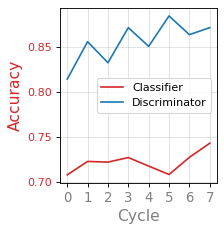

In [12]:
R.plot()